<a href="https://colab.research.google.com/github/luiz-star/Classificador_Agressivo_Passivo/blob/main/Classificador_agressivo_passivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classificador agressivo passivo em aprendizado de máquina


Passive Aggressive Classifier é um algoritmo de classificação que se enquadra na categoria de aprendizado online em aprendizado de máquina

In [ ]:
# Importando as Bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



In [ ]:
#Carregando os Dados e verificando as 5 primeiras linhas

data = pd.read_csv('fake_or_real_news.csv')
print(data.head())

   Unnamed: 0  ... label
0        8476  ...  FAKE
1       10294  ...  FAKE
2        3608  ...  REAL
3       10142  ...  FAKE
4         875  ...  REAL

[5 rows x 4 columns]


Portanto, como mencionado acima, Passive Aggressive Classifier é um algoritmo de aprendizagem online onde você treina um sistema de forma incremental, alimentando-o com instâncias sequencialmente, individualmente ou em pequenos grupos chamados minilotes.

No aprendizado online, um modelo de aprendizado de máquina é treinado e implantado na produção de uma maneira que continua a aprender conforme chegam novos conjuntos de dados. Portanto, podemos dizer que um algoritmo como o Passive Aggressive Classifier é melhor para sistemas que recebem dados em um fluxo contínuo.

In [ ]:
#obtendo os valores de destino do conjunto de dados

labels = data.label
print(labels.head())

target = data.label.value_counts()
print(target)



0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object
REAL    3171
FAKE    3164
Name: label, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


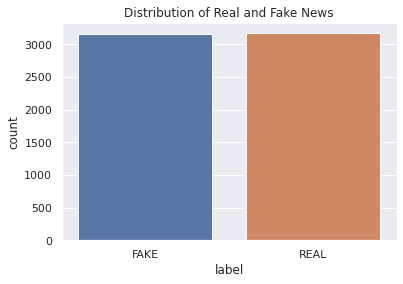

In [ ]:
# Verificando a distribuição dos dados

sns.countplot(data.label)
plt.title("Distribution of Real and Fake News")
plt.show()

Como você pode ver que o conjunto de dados é igualmente distribuído com notícias reais e falsas, vamos dividir os dados em conjuntos de treinamento e teste:

In [ ]:
# Dividindo o conjunto de Dados
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data['text'], 
                                                labels, test_size=0.2, 
                                                random_state=7)

Agora vamos treinar o modelo de detecção de notícias falsas usando o algoritmo Passivo Agressivo e verificar a precisão do modelo:

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(train, ytrain)

ypred = pac.predict(test)

from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(ytest, ypred)
print(f'Accuracy Score of Passive Aggresive Scassifier: {round(accuracy*100,2)}%')

Accuracy Score of Passive Aggresive Scassifier: 92.9%


Como estamos trabalhando em um conjunto de dados que contém dados textuais, é necessário remover as palavras de interrupção antes de treinar o modelo:

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
train = tfidf.fit_transform(xtrain)
test = tfidf.transform(xtest)

In [ ]:
print(confusion_matrix(ytest, ypred, labels=["FAKE", "REAL"]))

[[589  49]
 [ 41 588]]


classificador Passivo Agressivo no aprendizado de máquina. Simplificando, ele permanece passivo para previsões corretas e responde agressivamente às previsões incorretas.

## Conclusão:

se você deseja trabalhar com big data, este é um classificador muito importante e eu o encorajo a prosseguir e tentar construir um projeto usando este classificador e usar dados ao vivo de um site de mídia social como o Twitter como entrada. Haverá uma grande quantidade de dados chegando a cada segundo e este classificador será capaz de lidar com dados desse tamanho.

## Fim